0.7532296763172188
0.8906728114287475
Time values: [ 0.    0.01  0.02 ...  9.98  9.99 10.  ]
Solution values:
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e-02 6.02583741e-04]
 [2.00939708e-02 1.21273812e-03]
 ...
 [1.53439861e+00 1.39189794e+00]
 [1.53378177e+00 1.39273626e+00]
 [1.53316489e+00 1.39357349e+00]]


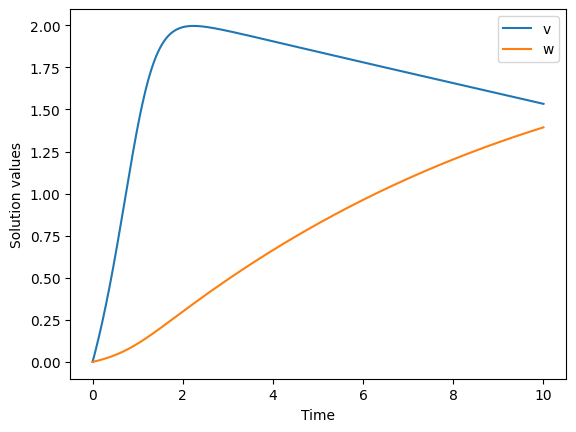

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt


#Solve the system using Forward Euler method
def forward_euler_system(f, y0, t_span, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]

    for t in t_values[:-1]:
        y_next = y_values[-1] + h * np.array(f(t, y_values[-1]))
        y_values.append(y_next)

    return t_values, np.array(y_values)


# Define the system of ODEs as a function f(t, y)
def f(t, y):
    a=random.uniform(0.6, 0.8)
    b=random.uniform(0.7,0.9)
    eps=0.08
    I=1
    dy1_dt = y[0] - (y[0]**3)/3 - y[1]+I
    dy2_dt = eps*(y[0] + a - b*y[1])
    return [dy1_dt, dy2_dt]

# Initial values
y0 = [0, 0]

# Time span and step size
t_span = [0, 10]
h = 0.01



# Solve the system using forward Euler
t_values, y_values = forward_euler_system(f, y0, t_span, h)

#Plot the results
print("Time values:", t_values)
print("Solution values:")
print(y_values)

plt.plot(t_values, y_values[:, 0], label='v')
plt.plot(t_values, y_values[:, 1], label='w')
plt.xlabel('Time')
plt.ylabel('Solution values')
plt.legend()
plt.show()


0.651785441389095
0.8368620242374462


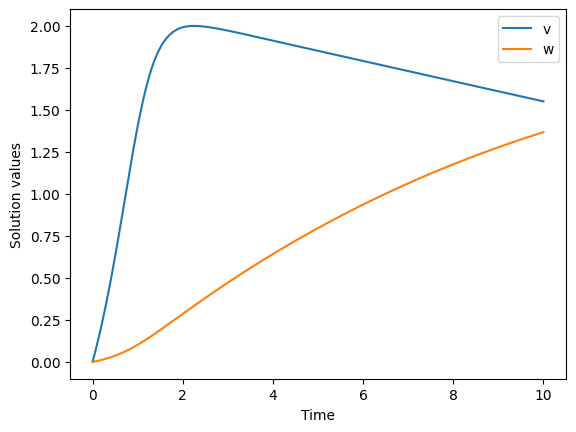

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import random



# Define the system of ODEs
def f(t, y):
    a=random.uniform(0.6, 0.8)
    b=random.uniform(0.7,0.9)
    eps=0.08
    I=1
    dy1_dt = y[0] - (y[0]**3)/3 - y[1]+I
    dy2_dt = eps*(y[0] + a - b*y[1])
    return [dy1_dt, dy2_dt]

# Set initial conditions
y0 = [0, 0]

# Set the time points at which to solve the ODEs
t = np.linspace(0, 10, 1000)
t_span=[0,10]


# Solve the ODEs
solution = solve_ivp(f, t_span, y0,'BDF',t)

# Extract results for plotting or further analysis
t_values = solution.t
y_values = solution.y

# Plot the results
plt.plot(t_values, y_values[0], label='v')
plt.plot(t_values, y_values[1], label='w')
plt.xlabel('Time')
plt.ylabel('Solution values')
plt.legend()
plt.show()